<a href="https://colab.research.google.com/github/EtzionR/LM4GeoAI/blob/main/Tutorial_OSMNX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ex 3: Basic Geo Agents and RAG

## created by Etzion Harari | Geo-AI Course

[https://github.com/EtzionR/LM4GeoAI](https://github.com/EtzionR/LM4GeoAI)

## pip install osmnx

In [1]:
!pip install -q osmnx

## Imports

In [2]:
import osmnx as ox

## Geocode adress (Using Nominatim)

In [3]:
adress = 'מגדלי עזריאלי, תל אביב'

y, x = ox.geocode(adress)

print(f'WGS84 GEO DD X = {round(x,6)}, Y = {round(y,6)}\t(EPSG:4326)')

WGS84 GEO DD X = 34.791987, Y = 32.075257	(EPSG:4326)


## Load data OSM by point and radius

In [4]:
center_point = (y, x)
distance_radius = 100
tags = {"amenity": True}

pois = ox.features.features_from_point(center_point = center_point,
                                       dist=distance_radius,
                                       tags = tags)

print(f'Output shape: {pois.shape}')

pois.head(3)

Output shape: (29, 41)


geometry          amenity  \
element id                                                       
node    3601347182  POINT (34.79258 32.07502)  bicycle_parking   
        3601347184  POINT (34.79234 32.07515)  bicycle_parking   
        3601347186  POINT (34.79177 32.07482)  bicycle_parking   

                   bicycle_parking capacity covered        operator cuisine  \
element id                                                                    
node    3601347182          stands       28      no  Azrieli Center     NaN   
        3601347184          stands       20      no  Azrieli Center     NaN   
        3601347186             NaN      NaN     yes             NaN     NaN   

                   indoor_seating name name:he  ... material seats access  \
element id                                      ...                         
node    3601347182            NaN  NaN     NaN  ...      NaN   NaN    NaN   
        3601347184            NaN  NaN     NaN  ...      NaN   NaN    NaN   
        3601347186            NaN  NaN     NaN  ...      NaN   NaN    NaN   

                    fee operator:wikidata operator:wikipedia short_name  \
element id                                                                
node    3601347182  NaN               NaN                NaN        NaN   
        3601347184  NaN               NaN                NaN        NaN   
        3601347186  NaN               NaN                NaN        NaN   

                   armrest toilets parking  
element id                                  
node    3601347182     NaN     NaN     NaN  
        3601347184     NaN     NaN     NaN  
        3601347186     NaN     NaN     NaN  

[3 rows x 41 columns]

In [6]:
gap = .004

bbox = [x-gap, y-gap, x+gap, y+gap]

G = ox.graph.graph_from_bbox(bbox,
                             truncate_by_edge =True,
                             network_type ='drive',
                             simplify =False)

print(f'Graph loaded!\n|V| = {len(G.nodes)}\n|E| = {len(G.edges)}')



Graph loaded!
|V| = 728
|E| = 828


In [9]:
y2, x2 = 32.076, 34.796

node1 = ox.distance.nearest_nodes(G, x, y)
node2 = ox.distance.nearest_nodes(G, x2, y2)

print(f'The closest node to point 1 ({x}, {y}): {node1}\nThe closest node to point 2 ({x2}, {y2}): {node2}')

The closest node to point 1 (34.7919866, 32.0752574): 10127317528
The closest node to point 2 (34.796, 32.076): 11155512364


In [10]:
route_osm_ids = ox.routing.shortest_path(G, orig=node1, dest=node2)

print(f'Number of nodes in the route from point 1 to point 2: {len(route_osm_ids)} nodes')

Number of nodes in the route from point 1 to point 2: 17 nodes


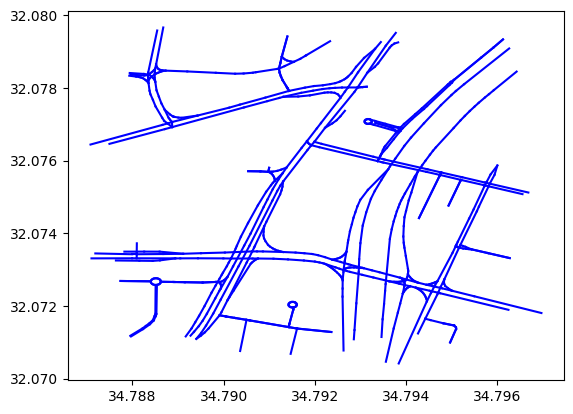